<a href="https://colab.research.google.com/github/jsaulme/Aprendizaje_Automatico_MCD/blob/main/tareas/05_Aprendizaje_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
import pandas as pd
from datetime import datetime

El análisis de beneficio (profit) negativo mediante series temporales proporciona una visión esencial para abordar desafíos financieros recurrentes. Permite identificar patrones estacionales y tendencias a largo plazo que influyen el las ganancias, como fluctuaciones en la demanda y problemas estructurales. Además, facilita la detección de anomalías y eventos extraordinarios, ayudando a mitigar factores que impactan negativamente esta métrica. La capacidad de predecir profits futuros con modelos como ARIMA es crucial para la planificación financiera y toma de decisiones estratégicas, permitiendo anticiparse a períodos donde se estimen perdidas. Asimismo, evalúa el impacto de intervenciones y cambios estratégicos, ofreciendo retroalimentación sobre la efectividad de las estrategias y permitiendo ajustes continuos. De esta mananera, el análisis de series temporales es vital para comprender los profits negativos, identificar causas subyacentes y planificar estrategias para mejorar la rentabilidad.

### Métricas para Evaluar el Desempeño del Modelo ARIMA

1. **Error Absoluto Medio (MAE - Mean Absolute Error)**
   - Calcula la media de los errores absolutos entre los valores reales y las predicciones.
   - **Fórmula:** \( \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| \)

2. **Error Cuadrático Medio (MSE - Mean Squared Error)**
   - Calcula la media de los cuadrados de los errores entre los valores reales y las predicciones.
   - **Fórmula:** \( \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \)

3. **Raíz del Error Cuadrático Medio (RMSE - Root Mean Squared Error)**
   - Es la raíz cuadrada del MSE y proporciona una medida del error en las mismas unidades que los datos.
   - **Fórmula:** \( \text{RMSE} = \sqrt{\text{MSE}} \)

4. **Error Porcentual Absoluto Medio (MAPE - Mean Absolute Percentage Error)**
   - Calcula la media de los errores absolutos en porcentaje, permitiendo comparar el error relativo.
   - **Fórmula:** \( \text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100 \)

5. **Coeficiente de Determinación (R² - R-squared)**
   - Mide la proporción de la varianza total de los datos que es explicada por el modelo.
   - **Fórmula:** \( R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} \)

6. **Akaike Information Criterion (AIC)**
   - Evalúa la calidad del modelo en términos de ajuste y complejidad. Menores valores de AIC indican un mejor modelo.
   - **Fórmula:** \( \text{AIC} = 2k - 2\ln(L) \), donde \(k\) es el número de parámetros y \(L\) es la función de verosimilitud máxima.

7. **Bayesian Information Criterion (BIC)**
   - Similar al AIC, pero penaliza modelos con más parámetros. Menores valores de BIC indican un mejor modelo.
   - **Fórmula:** \( \text{BIC} = \ln(n)k - 2\ln(L) \), donde \(n\) es el número de observaciones.


In [48]:
display(Math(r'\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|'))

<IPython.core.display.Math object>

In [49]:
display(Math(r'\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \')'))


<IPython.core.display.Math object>

In [50]:
display(Math(r'\text{RMSE} = \sqrt{\text{MSE}}'))

<IPython.core.display.Math object>

In [51]:
display(Math(r'\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100'))
#

<IPython.core.display.Math object>

In [52]:
display(Math(r'R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}'))

<IPython.core.display.Math object>

In [53]:
display(Math(r'\text{AIC} = 2k - 2\ln(L)'))

<IPython.core.display.Math object>

In [54]:
display(Math(r'\text{BIC} = \ln(n)k - 2\ln(L)'))

<IPython.core.display.Math object>

# Modelo ARIMA
### Autoregressive Integrated Moving Average

In [55]:
# Cargar dataset desde mi github

url = "https://raw.githubusercontent.com/jsaulme/datasets/main/Global_superstore2018_procesado.csv"
data = pd.read_csv(url)
data.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,...,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day,Ship Day,Ship Month,Ship Year,Delivery Time
0,MX-2017-SC2057582-43010,2017-10-02,2017-10-06,Standard Class,SC-2057582,Sonia Cooley,Consumer,0,Mexico City,Distrito Federal,...,4.56,2.033,Medium,2017,10,2,6,10,2017,4
1,MX-2015-KW1657028-42292,2015-10-15,2015-10-20,Standard Class,KW-1657028,Kelly Williams,Consumer,0,Dos Quebradas,Risaralda,...,90.72,13.449,Medium,2015,10,15,20,10,2015,5
2,MX-2015-KW1657028-42292,2015-10-15,2015-10-20,Standard Class,KW-1657028,Kelly Williams,Consumer,0,Dos Quebradas,Risaralda,...,54.08,9.627,Medium,2015,10,15,20,10,2015,5


In [56]:
# Filtrar los valores negativos del profit

negative_profit = data[data['Profit'] < 0]
negative_profit.head(3).iloc[:,20:]


,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day,Ship Day,Ship Month,Ship Year,Delivery Time
16,-6.600,1.602,Medium,2016,6,26,1,7,2016,5
17,-149.100,27.770,Medium,2016,6,26,1,7,2016,5
18,-6.064,2.137,Medium,2016,6,26,1,7,2016,5


In [57]:
# Filtra las columnas que contienen fechas

[col for col in data.columns if 'Date' in col]

['Order Date', 'Ship Date']

In [58]:
# Aplica formato de fecha para el modelo ARIMA

# Convierte las columnas de fecha a formato datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Extract the year, month, and day components
data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month
data['Order Day'] = data['Order Date'].dt.day

# Extract the year, month, and day components
data['Ship Year'] = data['Ship Date'].dt.year
data['Ship Month'] = data['Ship Date'].dt.month
data['Ship Day'] = data['Ship Date'].dt.day

# Print the first three rows of the modified data
data.head(3).iloc[:,20:]


,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day,Ship Day,Ship Month,Ship Year,Delivery Time
0,4.56,2.033,Medium,2017,10,2,6,10,2017,4
1,90.72,13.449,Medium,2015,10,15,20,10,2015,5
2,54.08,9.627,Medium,2015,10,15,20,10,2015,5


In [59]:
# Indexar por fecha

negative_profit.set_index('Order Date', inplace=True)

In [60]:
# Indexar por fecha
negative_profit = data[data['Profit'] < 0].copy() # Create a copy to avoid modifying the original DataFrame
negative_profit = negative_profit.set_index('Order Date') # Set 'Order Date' as the index

# Resampling
monthly_negative_profit = negative_profit['Profit'].resample('M').sum()
print(monthly_negative_profit)

Order Date
2014-01-31    -9903.87774
2014-02-28    -7915.05510
2014-03-31    -8872.50070
2014-04-30    -7090.61110
2014-05-31   -11629.52540
2014-06-30   -19103.16332
2014-07-31   -13863.66332
2014-08-31   -14154.99830
2014-09-30   -19422.76286
2014-10-31   -14203.17938
2014-11-30   -21883.04370
2014-12-31   -21265.77560
2015-01-31   -12055.92600
2015-02-28    -5539.79710
2015-03-31   -14731.19840
2015-04-30   -11831.50526
2015-05-31   -12569.71712
2015-06-30   -18743.00188
2015-07-31   -11611.58010
2015-08-31   -15839.16634
2015-09-30   -21819.53930
2015-10-31   -15027.41782
2015-11-30   -26269.20590
2015-12-31   -29304.28564
2016-01-31   -10299.41960
2016-02-29   -11114.14344
2016-03-31   -15370.45144
2016-04-30   -14799.71850
2016-05-31   -17723.29402
2016-06-30   -29819.41514
2016-07-31   -16316.52622
2016-08-31   -24445.82358
2016-09-30   -31760.61384
2016-10-31   -19781.58908
2016-11-30   -25848.62332
2016-12-31   -28627.56964
2017-01-31   -16130.23322
2017-02-28   -14311.22360
2

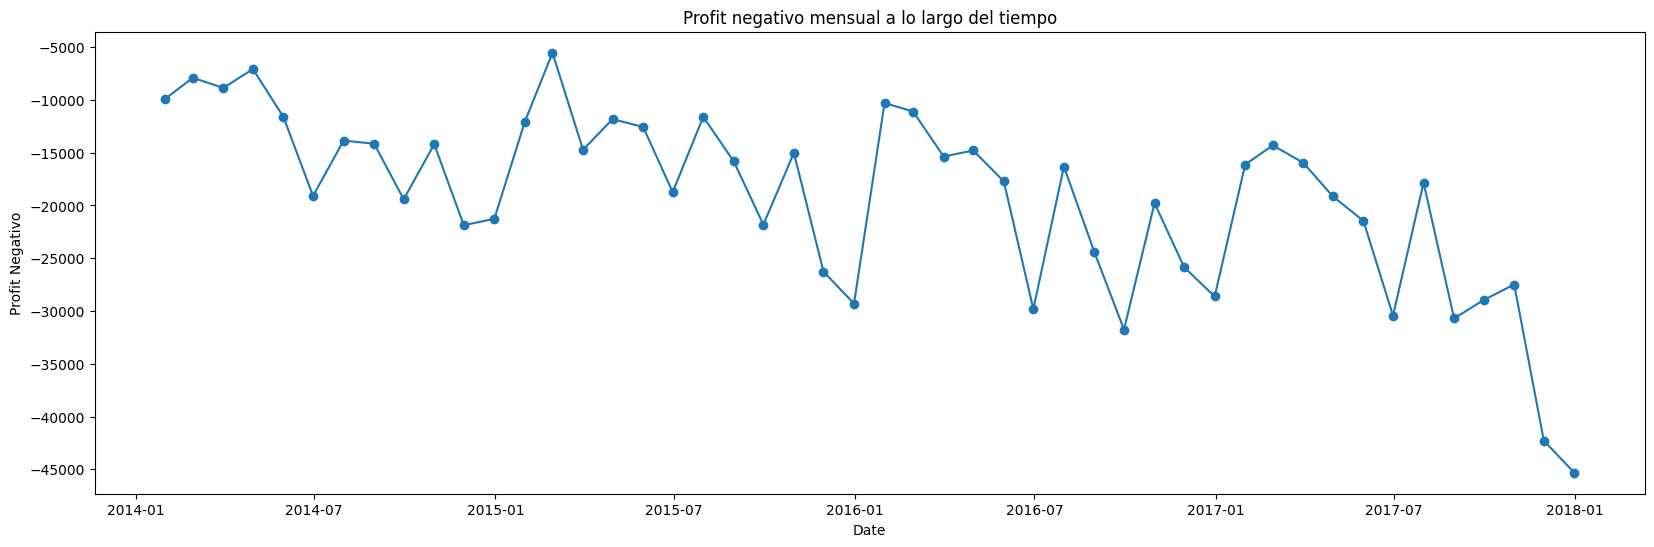

In [61]:
# Crear una nueva figura
plt.figure(figsize=(20, 6))

# Generar un gráfico de líneas de los beneficios negativos mensuales
plt.plot(monthly_negative_profit, marker='o')

# Ttítulo del gráfico
plt.title('Profit negativo mensual a lo largo del tiempo')

# Etiqueta del eje x como 'Date'
plt.xlabel('Date')

# Etiqueta del eje y como 'Profit Negativo'
plt.ylabel('Profit Negativo')

# Se muestra el gráfico
plt.show()


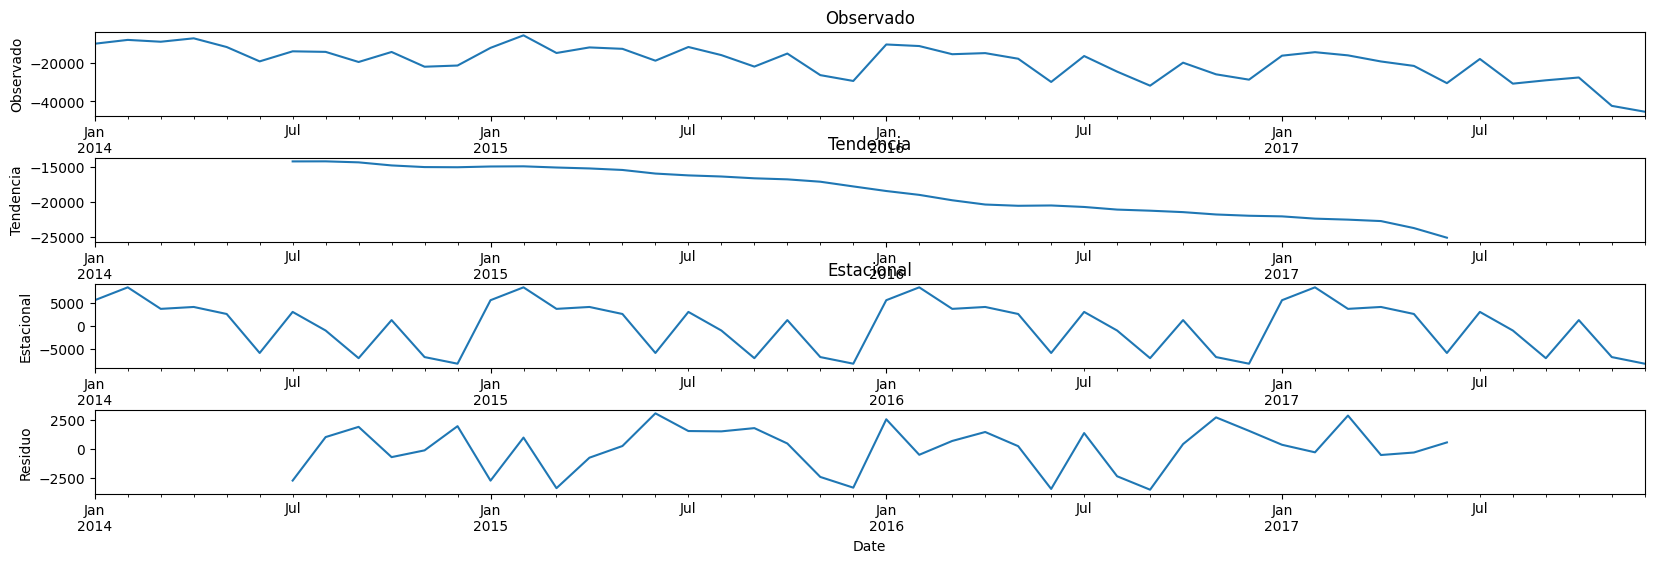

In [62]:
# Realizar la descomposición estacional
decomposition = seasonal_decompose(monthly_negative_profit)

# Crear una figura
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 6))

# Graficar la descomposición en los ejes creados
decomposition.observed.plot(ax=ax1, legend=False)
ax1.set_ylabel('Observado')

decomposition.trend.plot(ax=ax2, legend=False)
ax2.set_ylabel('Tendencia')

decomposition.seasonal.plot(ax=ax3, legend=False)
ax3.set_ylabel('Estacional')

decomposition.resid.plot(ax=ax4, legend=False)
ax4.set_ylabel('Residuo')

# Configurar los títulos de los ejes
ax1.set_title('Observado')
ax2.set_title('Tendencia')
ax3.set_title('Estacional')
ax4.set_xlabel('Date')

# Ajustar el espaciado entre subplots si es necesario
plt.subplots_adjust(hspace=0.5)

# Mostrar el gráfico
plt.show()



### Prueba de Dickey-Fuller Aumentada (ADF):

La Prueba de Dickey-Fuller Aumentada es una prueba de hipótesis que se utiliza para determinar si una serie temporal es estacionaria.

H0: la serie tiene una raíz unitaria, osea que no es estacionaria.



In [63]:
# Implementa la prueba de Dickey Fuller aumentada (ADF) con un valor de alpha de 0.05

# Definir la serie temporal
serie_temporal = monthly_negative_profit

# Realizar la prueba ADF
resultado = adfuller(serie_temporal)

# Imprimir los resultados
print(f"Estadístico ADF: {resultado[0]:.2f}")
print(f"p-valor: {resultado[1]:.4f}")

# Establecer el nivel de significancia
alpha = 0.05

# Interpretar los resultados
if resultado[1] > alpha:
  print("No se rechaza la hipótesis nula. La serie tiene una raíz unitaria.")
else:
  print("Se rechaza la hipótesis nula. La serie es estacionaria.")


Estadístico ADF: 0.90
p-valor: 0.9931
No se rechaza la hipótesis nula. La serie tiene una raíz unitaria.


### Interpretación de los Resultados
p-value:

Si el valor p es menor 0.05, rechazas la hipótesis nula y concluyes que la serie es estacionaria.
En este caso, el valor p es 0.9931, que es mayor que 0.05. Por lo tanto, no se rechaza la hipótesis nula, osea que la serie tiene una raíz unitaria.

Valor del Estadístico ADF:

Si el estadístico ADF es menor que un 0.05, puedes rechazar la hipótesis nula.

¿Qué Significa Que No Sea Estacionaria?

Si una serie temporal no es estacionaria, significa que sus propiedades estadísticas, como la media y la varianza, cambian con el tiempo. Esto puede deberse a tendencias, estacionalidad u otras formas de dependencia temporal.

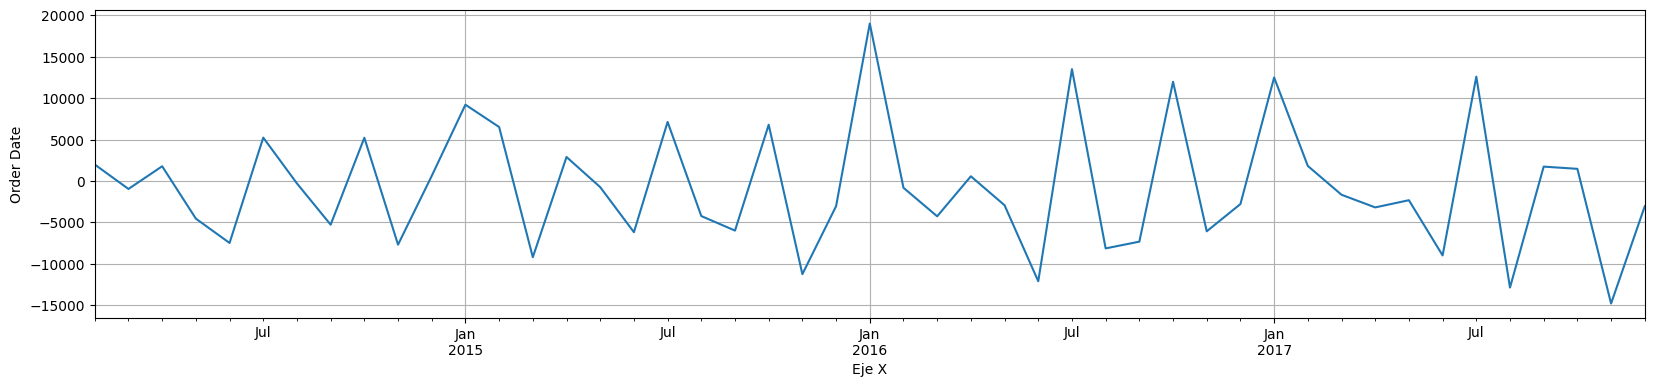

In [64]:
# Si la serie no es estacionaria, aplica diferenciación
monthly_negative_profit_diff = monthly_negative_profit.diff().dropna()

# Establece el tamaño de la figura
plt.figure(figsize=(20, 4))

# Grafica los datos
monthly_negative_profit_diff.plot()

# Establece los títulos de los ejes
plt.xlabel('Eje X')
plt.ylabel('Order Date')

# Agrega las líneas de la cuadrícula
plt.grid(True)

# Muestra el gráfico
plt.show()



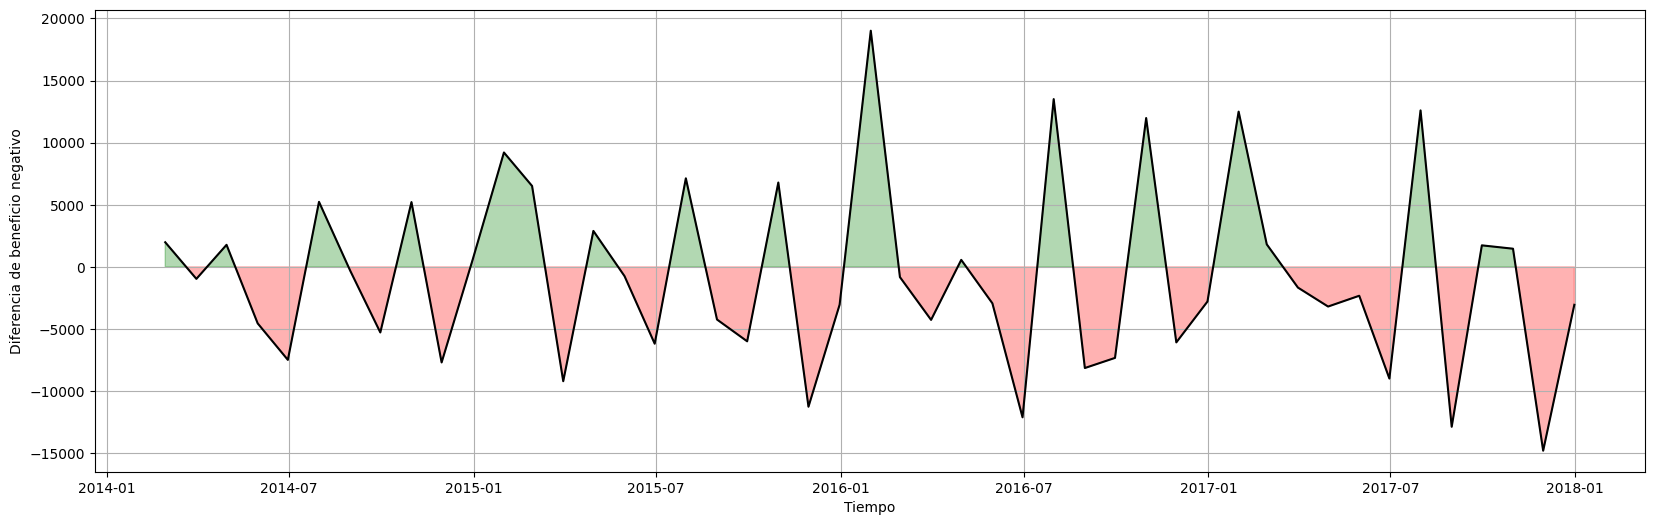

In [65]:
# Establece el tamaño de la figura
plt.figure(figsize=(20, 6))

# Grafica los datos con color condicional
plt.plot(monthly_negative_profit_diff.index, monthly_negative_profit_diff, color='black')
plt.fill_between(monthly_negative_profit_diff.index, monthly_negative_profit_diff, where=(monthly_negative_profit_diff>=0), color='green', alpha=0.3, interpolate=True)
plt.fill_between(monthly_negative_profit_diff.index, monthly_negative_profit_diff, where=(monthly_negative_profit_diff<0), color='red', alpha=0.3, interpolate=True)

# Establece los títulos de los ejes
plt.xlabel('Tiempo')
plt.ylabel('Diferencia de beneficio negativo')

# Agrega las líneas de la cuadrícula
plt.grid(True)

# Muestra el gráfico
plt.show()


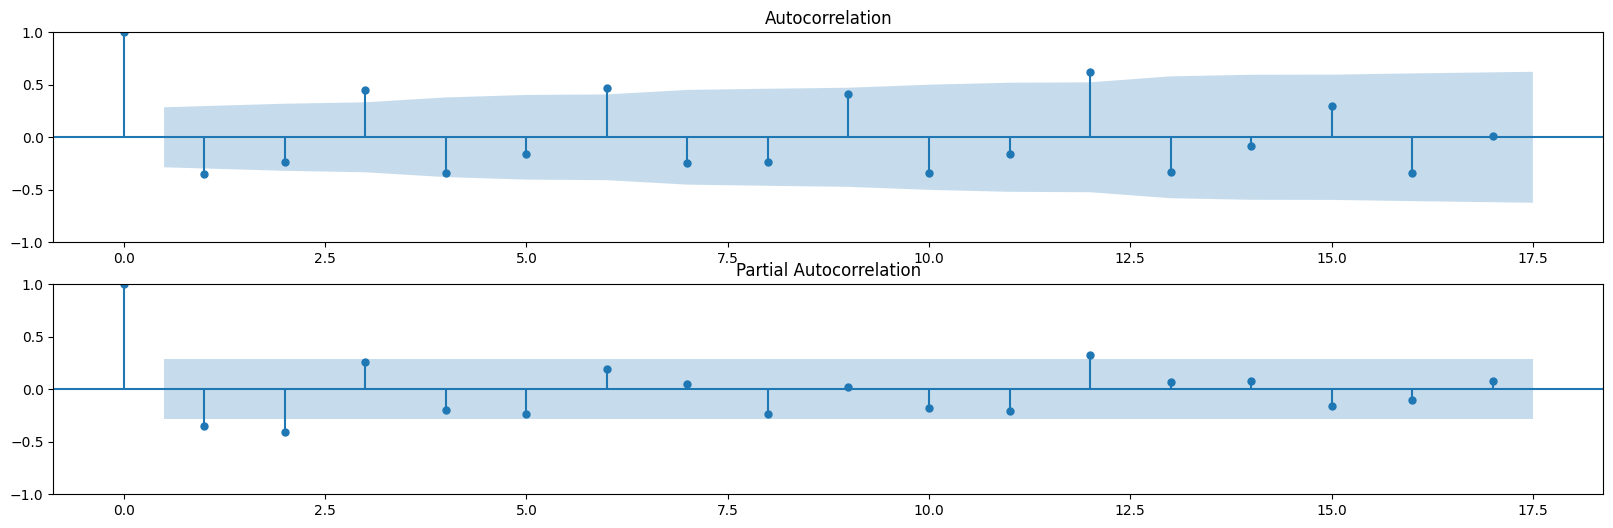

In [66]:
# Define el tamaño de la figura
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 6))

# Grafica el ACF
plot_acf(monthly_negative_profit_diff, ax=ax1)

# Grafica el PACF
plot_pacf(monthly_negative_profit_diff, ax=ax2)

# Muestra el gráfico
plt.show()


In [74]:
# Define el rango de valores p y q a probar
valores_p = range(2, 4)
valores_q = range(2, 4)

# Inicializa el mejor AIC y el mejor modelo
mejor_aic = np.inf
mejor_modelo = None

# Itera sobre todas las combinaciones de p y q
for p in valores_p:
    for q in valores_q:
        try:
            # Ajusta el modelo ARIMA
            modelo = ARIMA(monthly_negative_profit_diff, order=(p, 1, q))
            resultados = modelo.fit()

            # Obtiene el AIC
            aic = resultados.aic

            # Si este AIC es mejor que el mejor visto hasta ahora, actualiza el mejor AIC y el mejor modelo
            if aic < mejor_aic:
                mejor_aic = aic
                mejor_modelo = resultados # Guarda los resultados del modelo, no el modelo en sí
        except Exception as e:
            print(f"Error al ajustar ARIMA({p},1,{q}): {e}") # Imprime el error para diagnosticar el problema
            continue

# Verifica si se encontró un modelo válido antes de imprimir los resultados
if mejor_modelo is not None:
    print(f"El mejor modelo es ARIMA con p={mejor_modelo.model.order[0]} y q={mejor_modelo.model.order[2]}, que tiene un AIC de {mejor_aic}.")
else:
    print("Ninguno de los modelos ARIMA probados convergió.")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


El mejor modelo es ARIMA con p=2 y q=3, que tiene un AIC de 939.1754019146188.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [75]:
from statsmodels.tsa.arima.model import ARIMA

# Definir y ajustar el modelo ARIMA
p = 2  # determinado por el corte significativo en PACF
d = 1  # determinado por la diferenciación necesaria para estacionariedad
q = 3  # determinado por el corte significativo en ACF

model = ARIMA(monthly_negative_profit, order=(p, d, q))
model_fit = model.fit()

# Mostrar el resumen del modelo ajustado
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                 Profit   No. Observations:                   48
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -478.520
Date:                Sun, 07 Jul 2024   AIC                            969.041
Time:                        00:56:19   BIC                            980.142
Sample:                    01-31-2014   HQIC                           973.218
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4792      0.162     -2.952      0.003      -0.797      -0.161
ar.L2         -0.8443      0.150     -5.646      0.000      -1.137      -0.551
ma.L1         -0.0141      0.188     -0.075      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


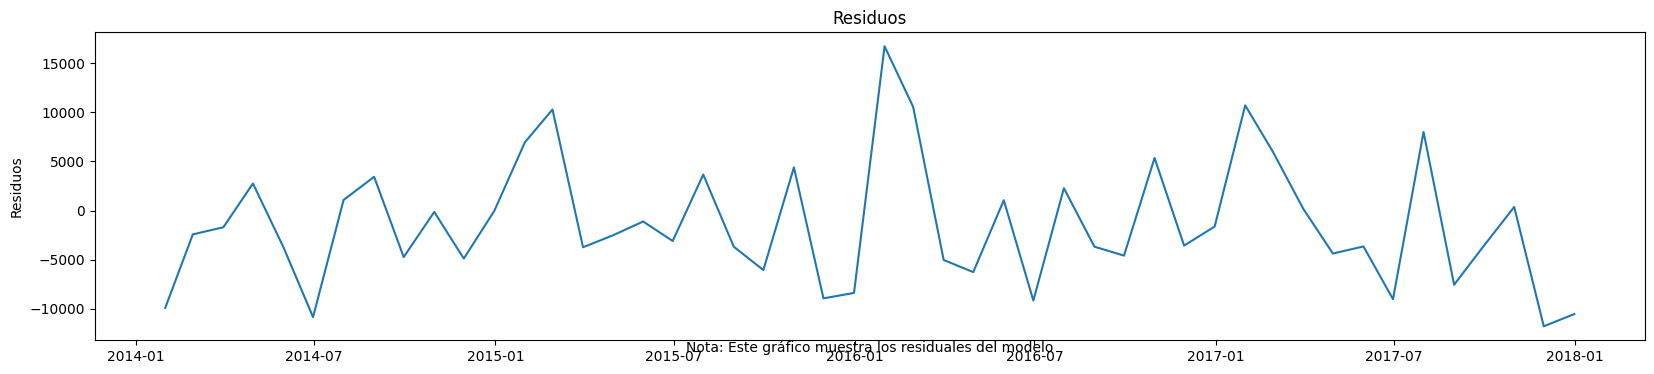

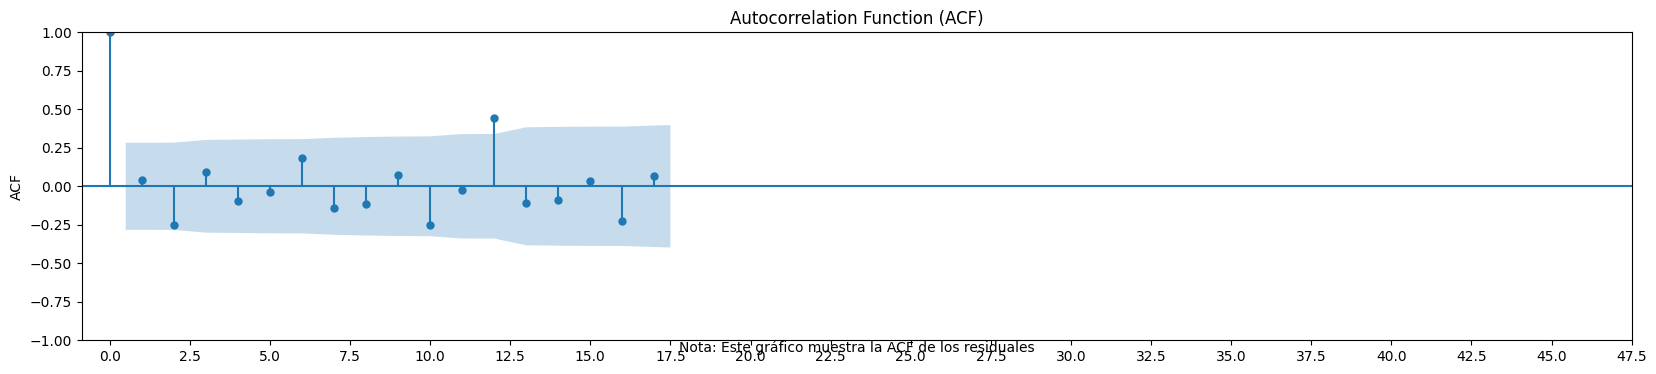

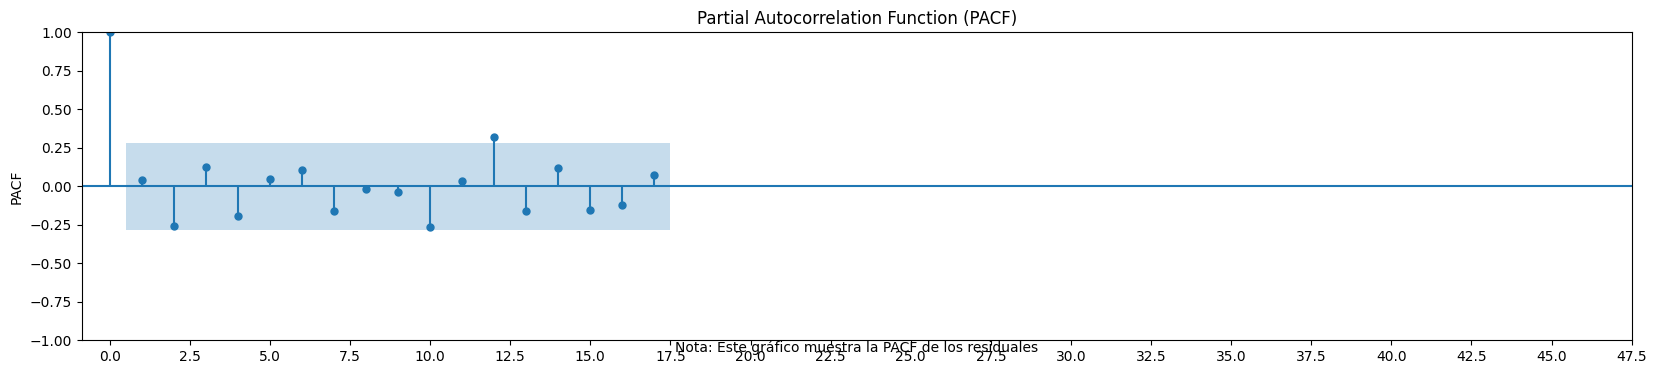

In [76]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# Diagnóstico del modelo
residuals = model_fit.resid

# Plot de los residuales
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(residuals)
ax.set_title('Residuos')
ax.set_ylabel('Residuos')
ax.annotate('Nota: Este gráfico muestra los residuales del modelo', xy=(0.5, 0), xycoords='axes fraction', fontsize=10, ha='center', va='top')
plt.show()

# Plot de ACF
fig, ax = plt.subplots(figsize=(20, 4))
plot_acf(residuals, ax=ax)
ax.set_title('Autocorrelation Function (ACF)')
ax.set_ylabel('ACF')
ax.annotate('Nota: Este gráfico muestra la ACF de los residuales', xy=(0.5, 0), xycoords='axes fraction', fontsize=10, ha='center', va='top')
ax.set_xticks(np.arange(0, len(residuals), 2.5))  # Ajustar ticks del eje X
plt.show()

# Plot de PACF
fig, ax = plt.subplots(figsize=(20, 4))
plot_pacf(residuals, ax=ax)
ax.set_title('Partial Autocorrelation Function (PACF)')
ax.set_ylabel('PACF')
ax.annotate('Nota: Este gráfico muestra la PACF de los residuales', xy=(0.5, 0), xycoords='axes fraction', fontsize=10, ha='center', va='top')
ax.set_xticks(np.arange(0, len(residuals), 2.5))  # Ajustar ticks del eje X
plt.show()

### Realizar la prueba de Ljung-Box sobre los residuales

In [70]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Realizar la prueba de Ljung-Box sobre los residuales
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)

# Imprimir los resultados de la prueba de Ljung-Box
print("Resultados de la prueba de Ljung-Box:")
print(ljung_box_result)

# # Interpretación de los resultados
# if p_value > 0.05:
#     print("\nInterpretación:")
#     print("Un valor p mayor que 0.05 indica que no podemos rechazar la hipótesis nula de que no hay autocorrelación en los residuales.")
#     print("Esto significa que los residuales del modelo ARIMA se comportan como ruido blanco.")
#     print("En otras palabras, el modelo ha capturado adecuadamente la estructura de la serie temporal y no queda ninguna autocorrelación significativa en los residuales.")
#     print("Por lo tanto, el modelo tiene un buen desempeño.")
# else:
#     print("\nInterpretación:")
#     print("Un valor p menor que 0.05 indicaría que podemos rechazar la hipótesis nula de que no hay autocorrelación en los residuales.")
#     print("Esto significaría que hay autocorrelación en los residuales, sugiriendo que el modelo ARIMA no ha capturado toda la estructura temporal.")
#     print("Por lo tanto, el modelo podría no tener un buen desempeño y podría necesitar ajustes adicionales.")


Resultados de la prueba de Ljung-Box:
      lb_stat  lb_pvalue
10  12.607042    0.24648


# Explicación de los resultados
La prueba de Ljung-Box se utiliza para verificar si los residuales del modelo ARIMA son independientes.

Si los residuales son independientes, esto indica que el modelo ha capturado adecuadamente toda la estructura temporal en los datos.

In [71]:
# Obtener el valor del estadístico y el valor p
lb_stat = ljung_box_result['lb_stat'].values[0]
p_value = ljung_box_result['lb_pvalue'].values[0]

# Mostrar los resultados de manera comprensible
print(f"Estadístico de Ljung-Box (lb_stat): {lb_stat:.4f}")
print(f"Valor p (p-value): {p_value:.4f}")

Estadístico de Ljung-Box (lb_stat): 12.6070
Valor p (p-value): 0.2465



Interpretación:

Un valor p mayor que 0.05 indica que no podemos rechazar la hipótesis nula de que no hay autocorrelación en los residuales.
Esto significa que los residuales del modelo ARIMA se comportan como ruido blanco.

En otras palabras, el modelo ha capturado adecuadamente la estructura de la serie temporal y no queda ninguna autocorrelación significativa en los residuales.
Por lo tanto, el modelo tiene un buen desempeño.

# Predicciones a futuro

2018-01-31   -41534.048137
2018-02-28   -46351.519616
2018-03-31   -44021.528866
2018-04-30   -41070.666896
2018-05-31   -44452.070984
2018-06-30   -45323.049888
2018-07-31   -42050.670414
2018-08-31   -42883.523717
2018-09-30   -45247.317515
2018-10-31   -43411.314975
2018-11-30   -42295.398689
2018-12-31   -44380.351779
Freq: M, Name: predicted_mean, dtype: float64


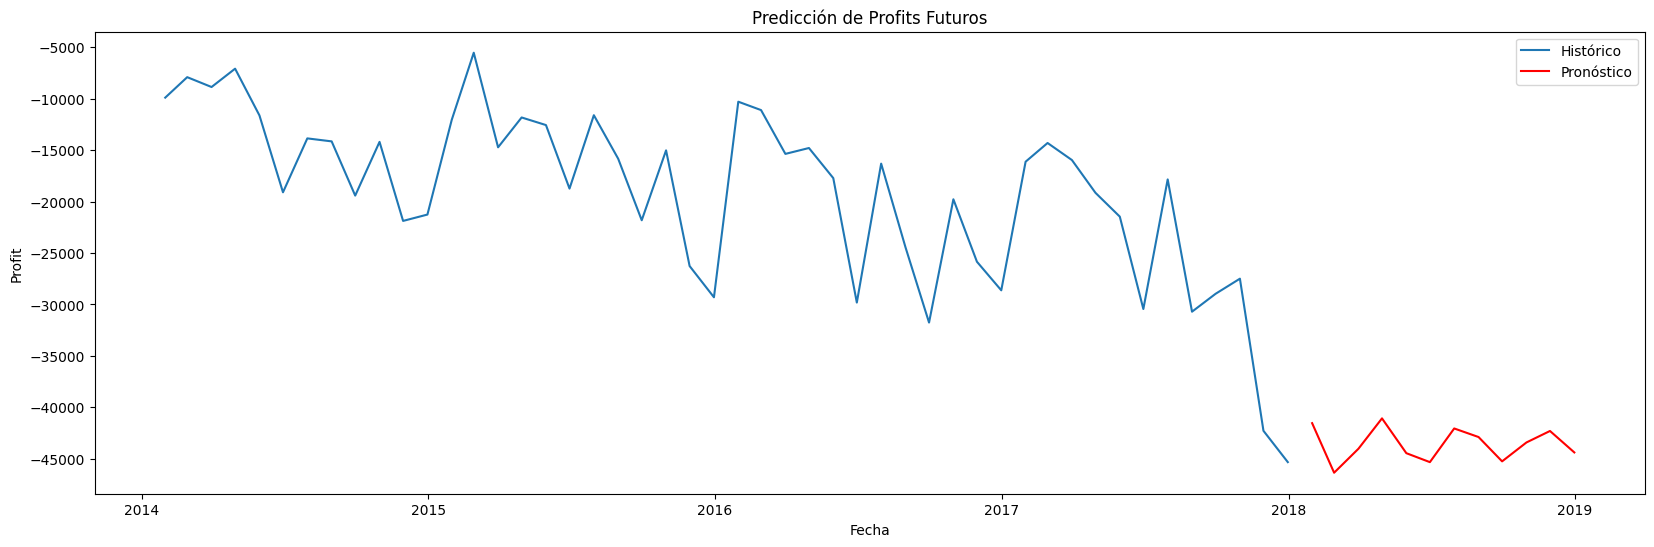

In [72]:
# Predecir profits futuros, por los próximos 12 meses
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Mostrar las predicciones
print(forecast)

# Graficar las predicciones junto con los datos históricos
plt.figure(figsize=(20, 6))
plt.plot(monthly_negative_profit, label='Histórico')
plt.plot(forecast, label='Pronóstico', color='red')
plt.title('Predicción de Profits Futuros')
plt.xlabel('Fecha')
plt.ylabel('Profit')
plt.legend()
plt.show()
